# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.152192e+01     6.818887e+00
 * time: 0.004746198654174805
     1     2.719835e+01     5.621017e+00
 * time: 0.013931035995483398
     2     2.124313e+01     7.464461e+00
 * time: 0.03708314895629883
     3     1.251849e+01     1.605975e+00
 * time: 0.06425309181213379
     4     1.212956e+01     2.646118e+00
 * time: 0.08295106887817383
     5     1.175646e+01     1.879000e+00
 * time: 0.1013021469116211
     6     1.115761e+01     2.188806e+00
 * time: 0.12025117874145508
     7     1.044419e+01     1.954805e+00
 * time: 0.1378931999206543
     8     9.893722e+00     1.216245e+00
 * time: 0.1561729907989502
     9     9.624684e+00     6.586216e-01
 * time: 0.17674517631530762
    10     9.364105e+00     8.634265e-01
 * time: 0.19614911079406738
    11     9.201279e+00     4.575869e-01
 * time: 0.2164900302886963
    12     9.065315e+00     6.348038e-01
 * time: 0.23117709159851074
    13     8.961181e+00     6.623626e-01
 * time: 0

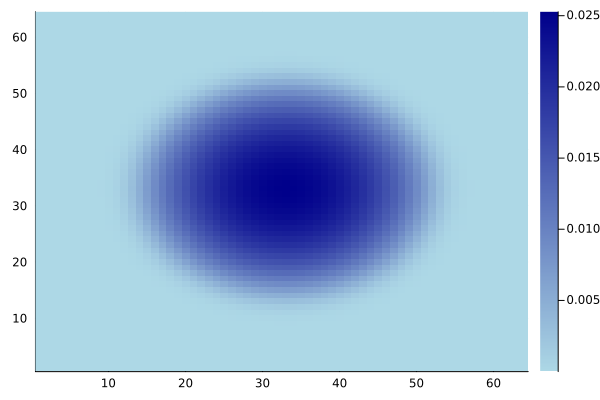

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)